<a href="https://colab.research.google.com/github/Rcabrera1221/Modelo-entrenamiento/blob/main/modeloentrenamiento9junio_visionc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install gdown


In [3]:
!gdown --id 1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1o-ij-D8KK56L4BlfCADdubkxcQJKiSO-
To: /content/imagenes_trabajo.zip
100% 23.0M/23.0M [00:00<00:00, 144MB/s] 


In [4]:
!unzip /content/imagenes_trabajo.zip -d /content/imagenes_descomprimidas


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_100.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1000.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1001.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1002.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1003.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1004.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1005.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1006.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1007.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1008.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_1009.png  
 extracting: /content/imagenes_descomprimidas/E/E_original_aug_101.png  
 extracting: /content/imagenes_descomprimidas/E/E_ori

In [5]:
!ls /content/imagenes_descomprimidas


E  O  θ  Σ


In [31]:
def cargar_imagenes(ruta_imagenes, tamano=(28, 28), clases=['E', 'O', 'Σ', 'θ']):
    X = []
    y = []# Verificación de la distribución de clases
clases = ['E', 'O', 'Σ', 'θ']
cantidad_por_clase = np.bincount(y.astype(int))

    for idx, clase in enumerate(clases):
        carpeta_clase = os.path.join(ruta_imagenes, clase)
        if os.path.exists(carpeta_clase):
            for archivo in os.listdir(carpeta_clase):
                if archivo.endswith(('jpg', 'jpeg', 'png', 'bmp')):
                    ruta_archivo = os.path.join(carpeta_clase, archivo)
                    imagen = imread(ruta_archivo, as_gray=True)
                    imagen_ajustada = resize(imagen, tamano)
                    X.append(imagen_ajustada)
                    y.append(idx)
    X = np.array(X)
    y = np.array(y)
    return X, y

In [32]:
# Ruta al directorio de imágenes descomprimidas
ruta_imagenes = '/content/imagenes_descomprimidas'

In [33]:
# Cargar las imágenes y etiquetas
X, y = cargar_imagenes(ruta_imagenes)

In [34]:
# Normalizar los valores de los píxeles
X = X / 255.0

In [35]:
# Imprimir el total de imágenes cargadas y el número por categoría
print(f"Total imágenes cargadas: {len(X)}")
print(f"Imágenes por categoría: {np.bincount(y)}")

Total imágenes cargadas: 5004
Imágenes por categoría: [1251 1251 1251 1251]


In [36]:
# Convertir a arrays de numpy y ajustar dimensiones
X = X.reshape(-1, 28, 28, 1)
y = np.array(y).astype(float)

In [37]:
import matplotlib.pyplot as plt

In [38]:
# Verificación de la distribución de clases
clases = ['E', 'O', 'Σ', 'θ']
cantidad_por_clase = np.bincount(y.astype(int))


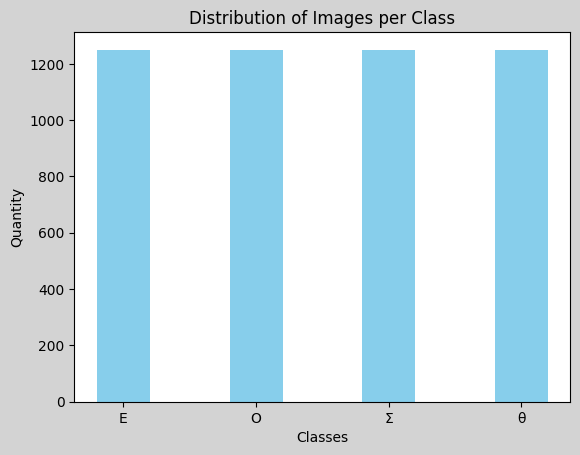

In [331]:

classes = ['E', 'O', 'Σ', 'θ']
num_images_per_class = [1250, 1250, 1250, 1250]

plt.figure(facecolor='lightgray')
plt.bar(range(len(classes)), num_images_per_class, tick_label=classes, width=0.4, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Quantity')
plt.title('Distribution of Images per Class')
plt.show()


In [40]:
# Definir un diccionario que mapee los operadores a etiquetas numéricas
label_map = {
    'E': 0,
    'O': 1,
    'Σ': 2,
    'θ': 3
}

In [41]:
y = y.astype(float)

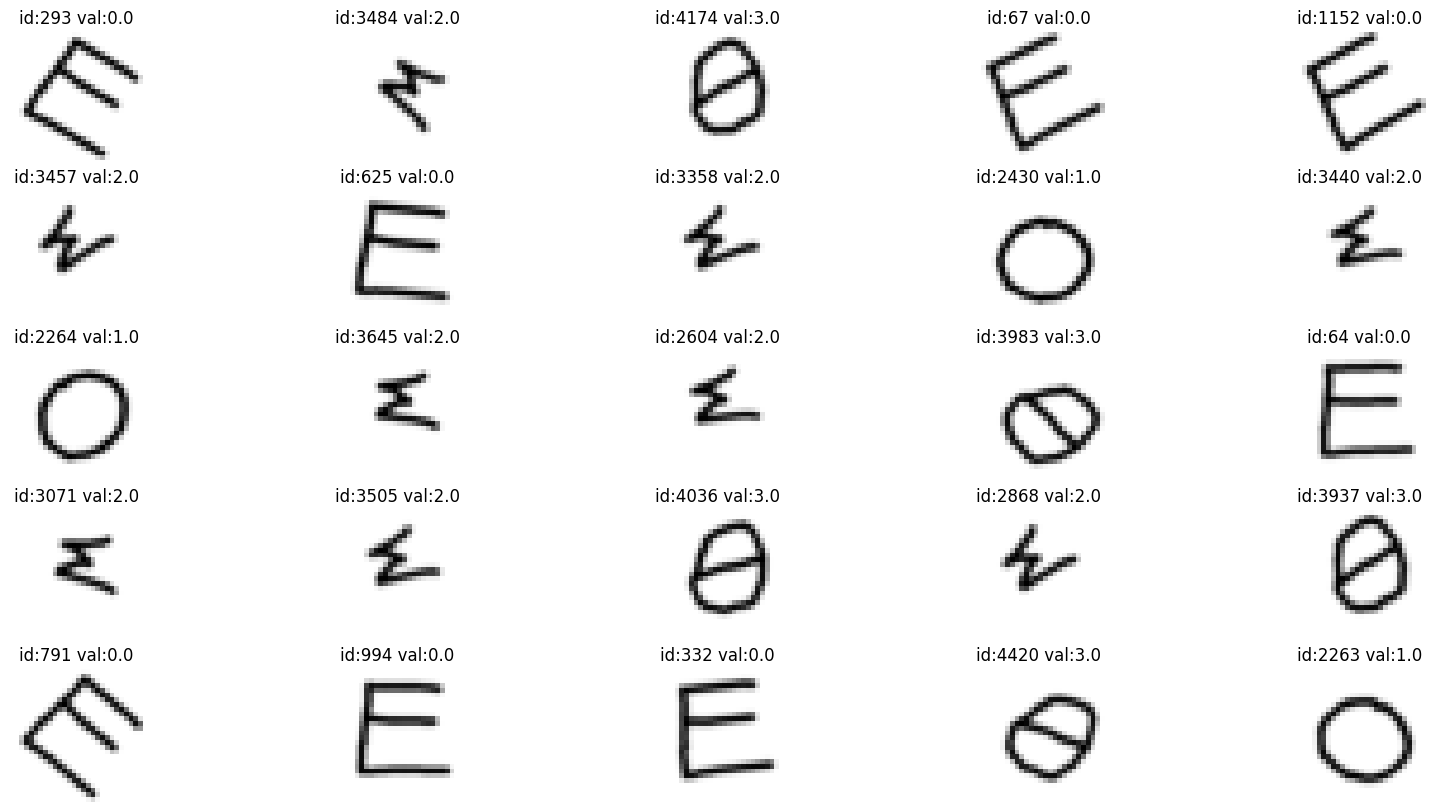

In [334]:
# Variables en inglés
num_images = 25

plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(5, 5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title(f'id:{idx} val:{y[idx]}')
    plt.imshow(X[idx], cmap='gray')
    plt.axis('off')

plt.show()

In [312]:
# Crear el modelo (Modelo denso, regular, con capas de Dropout y regularizadores L2)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),  # 1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Añadir Dropout con una tasa de 0.5
    tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Añadir otra capa de Dropout
    tf.keras.layers.Dense(4, activation='softmax')  # Ajustar la salida a 4 clases
])

In [314]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [315]:
datagen.fit(X_train)

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [317]:

num_datos_entrenamiento = len(X_train)
num_datos_pruebas = len(X_test)

# Trabajar por lotes
TAMANO_LOTE = 32

# Shuffle y repeat hacen que los datos estén mezclados de manera aleatoria
# para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = tf.data.Dataset.from_tensor_slices((X_train, y_train))
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = tf.data.Dataset.from_tensor_slices((X_test, y_test))
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

print(f"Número de datos de entrenamiento: {num_datos_entrenamiento}")
print(f"Número de datos de prueba: {num_datos_pruebas}")


Número de datos de entrenamiento: 4003
Número de datos de prueba: 1001


In [318]:
# Compilar el modelo con una tasa de aprendizaje ajustada
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [319]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [320]:
# Entrenar el modelo con early stopping
log = modelo.fit(X_train, y_train, batch_size=32,
                 validation_data=(X_test, y_test),
                 epochs=20,
                 callbacks=[early_stopping])

Epoch 1/20
126/126 [==============================] - 1s 4ms/step - loss: 1.5107 - accuracy: 0.2965 - val_loss: 1.4933 - val_accuracy: 0.5305
Epoch 2/20
126/126 [==============================] - 1s 5ms/step - loss: 1.4795 - accuracy: 0.3740 - val_loss: 1.4661 - val_accuracy: 0.3986
Epoch 3/20
126/126 [==============================] - 1s 5ms/step - loss: 1.4557 - accuracy: 0.4234 - val_loss: 1.4455 - val_accuracy: 0.4995
Epoch 4/20
126/126 [==============================] - 1s 5ms/step - loss: 1.4376 - accuracy: 0.4751 - val_loss: 1.4293 - val_accuracy: 0.5015
Epoch 5/20
126/126 [==============================] - 1s 5ms/step - loss: 1.4230 - accuracy: 0.5314 - val_loss: 1.4157 - val_accuracy: 0.5554
Epoch 6/20
126/126 [==============================] - 1s 5ms/step - loss: 1.4097 - accuracy: 0.5451 - val_loss: 1.4029 - val_accuracy: 0.6603
Epoch 7/20
126/126 [==============================] - 1s 4ms/step - loss: 1.3967 - accuracy: 0.5948 - val_loss: 1.3895 - val_accuracy: 0.5005
Epoch 

In [327]:
import matplotlib.pyplot as plt

def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f"Loss = {loss:.4f}")
    print(f"Accuracy = {acc:.4f}")

    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    train_loss = log.history['loss']
    train_acc = log.history['accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(14, 4), facecolor='lightgray')

    ax1, ax2 = axes
    ax1.plot(train_loss, label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(train_acc, label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()




Loss = 0.9558
Accuracy = 0.9840


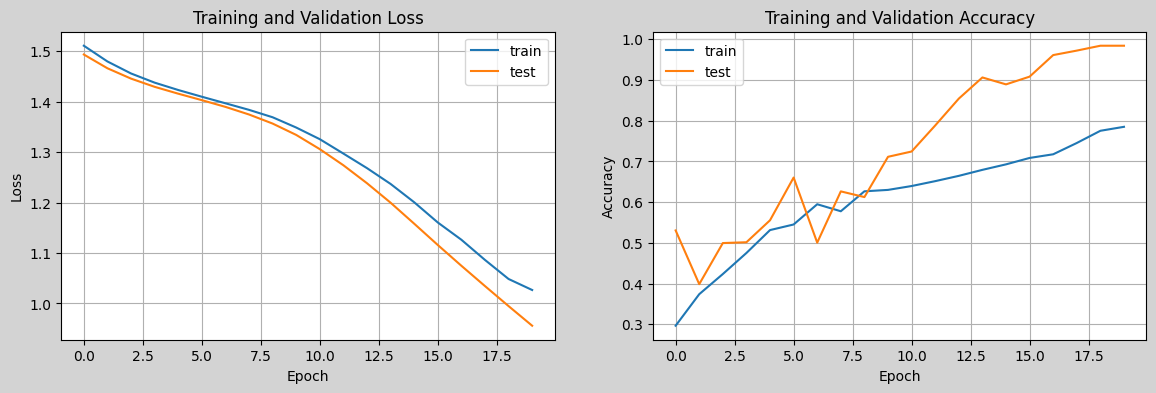

In [329]:
# Call the function to show the results
show_results(modelo,log)



32/32 [==============================] - 0s 1ms/step


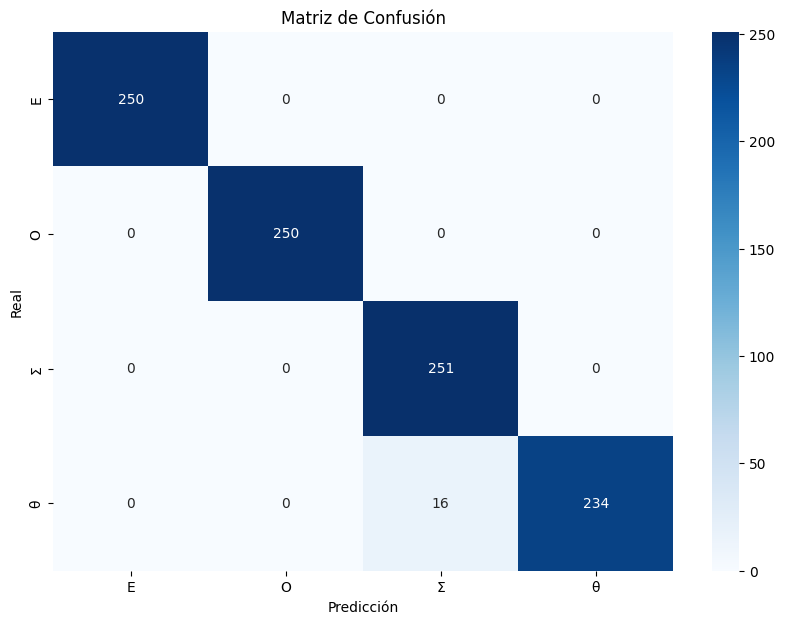

In [321]:
# Realizar predicciones
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#  Calcular la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar  matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [324]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Definir nombres de las clases
nombres_clases = ['E', 'O', 'Σ', 'θ']


32/32 [==============================] - 0s 1ms/step


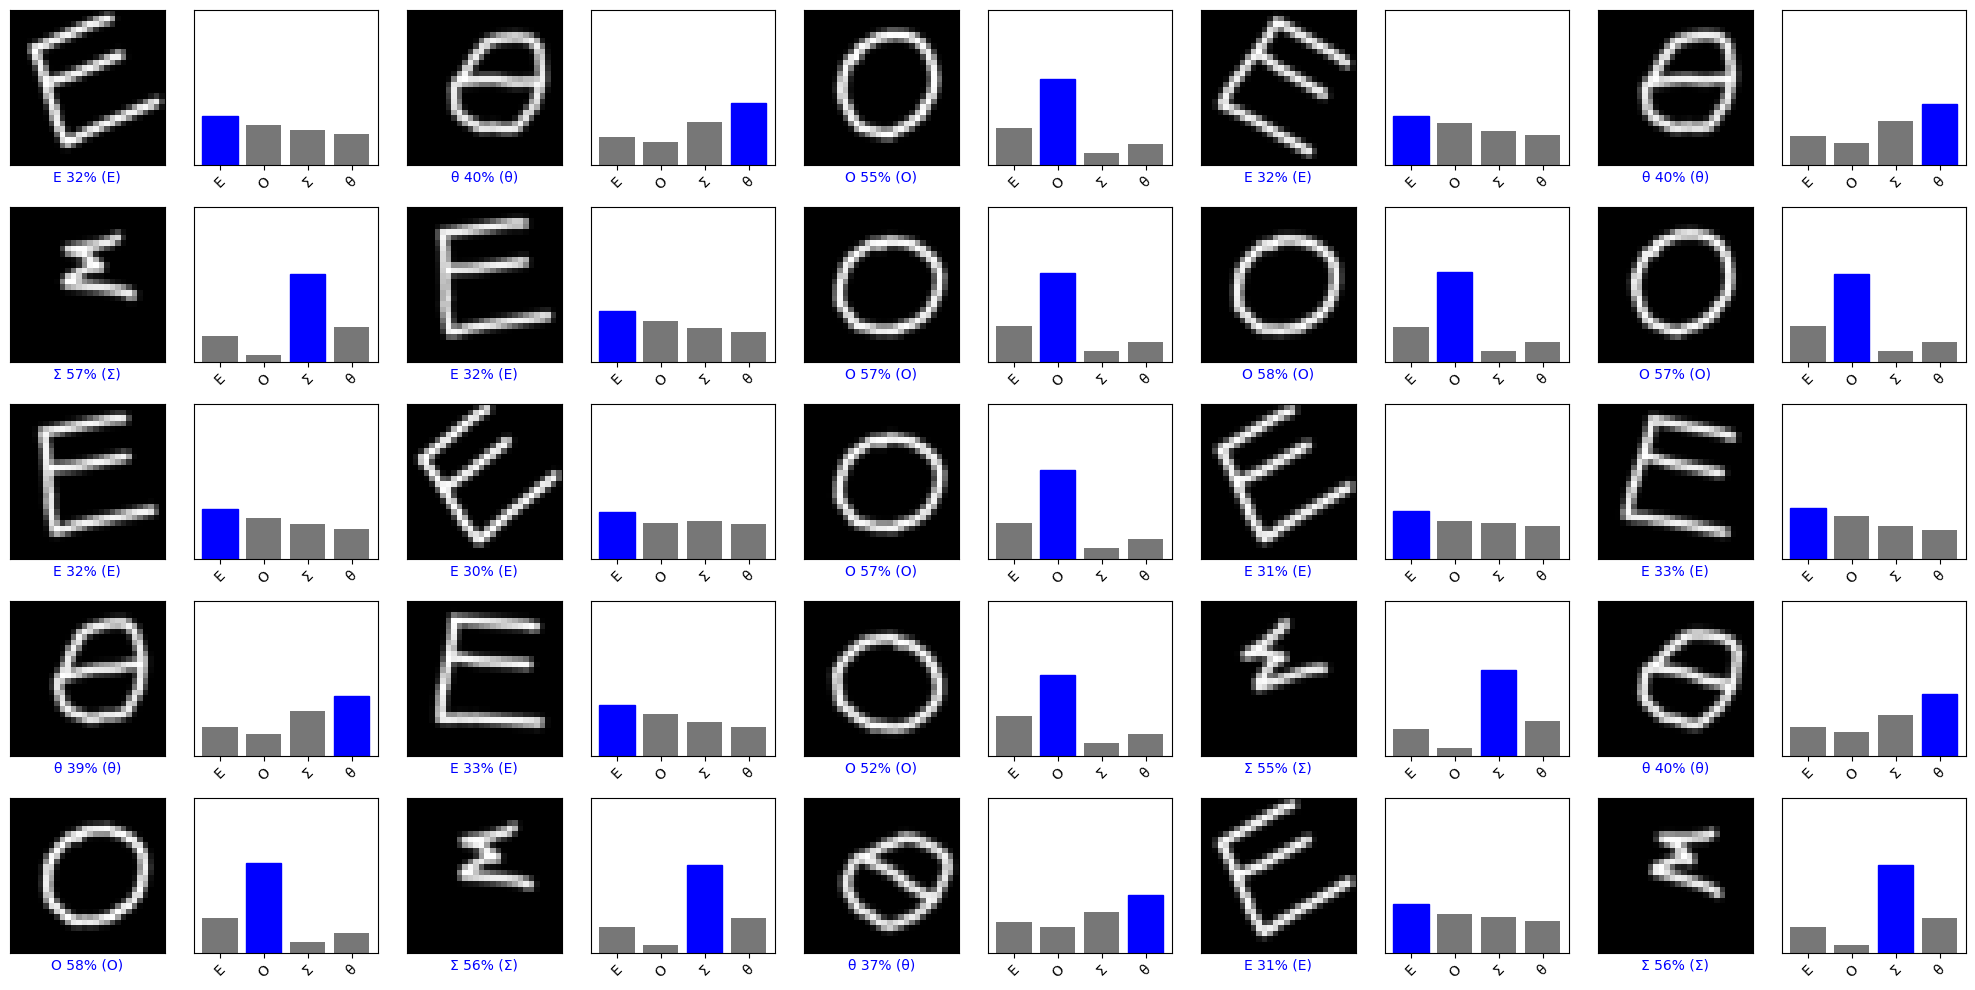

In [325]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_imagen(arr_predicciones, etiquetas_reales, imagenes, index):
    arr_predicciones, etiqueta_real, img = arr_predicciones[index], int(etiquetas_reales[index]), imagenes[index]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    etiqueta_prediccion = np.argmax(arr_predicciones)
    if etiqueta_prediccion == etiqueta_real:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        nombres_clases[etiqueta_prediccion],
        100 * np.max(arr_predicciones),
        nombres_clases[etiqueta_real]
    ), color=color)

def graficar_valor_arreglo(arr_predicciones, etiqueta_real, index):
    arr_predicciones, etiqueta_real = arr_predicciones[index], int(etiqueta_real[index])
    plt.grid(False)
    plt.xticks(range(4), nombres_clases, rotation=45)
    plt.yticks([])
    grafica = plt.bar(range(4), arr_predicciones, color="#777777")
    plt.ylim([0, 1])

    etiqueta_prediccion = np.argmax(arr_predicciones)

    grafica[etiqueta_prediccion].set_color('red')
    grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
    plt.subplot(filas, columnas*2, 2*i+1)
    graficar_imagen(y_pred, y_test, X_test, i)
    plt.subplot(filas, columnas*2, 2*i+2)
    graficar_valor_arreglo(y_pred, y_test, i)
plt.tight_layout()
plt.show()
